In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

project_dir = "/content/drive/MyDrive/ConvTest"
os.chdir(project_dir)

print("Current directory:", os.getcwd())


Current directory: /content/drive/MyDrive/ConvTest


In [3]:
# Check NVCC availability and version
!nvcc --version

# Check GPU architecture compatibility
!nvidia-smi

# Compile with appropriate architecture flag (sm_75 for T4, sm_80 for A100)
!nvcc -arch=sm_75 1.1_check_gpu_environment.cu -o gpu_check
!./gpu_check

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
Fri Aug 29 08:47:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P8       

In [4]:
# Step 1: GPU Environment Check
!nvcc -arch=sm_75 -O3 1.1_check_gpu_environment.cu -o gpu_check
!./gpu_check

# Step 2: CPU Baseline Establishment
!nvcc -arch=sm_75 -O3 1.2_cpu_baseline_convolution.cu -o cpu_baseline
!./cpu_baseline

# Step 3: CUDA Environment Optimization
!nvcc -arch=sm_75 -O3 1.3_cuda_optimization_setup.cu -o cuda_setup
!./cuda_setup

# Step 4: Install additional dependencies (minimal Python)
!pip install opencv-python matplotlib numpy --quiet


=== CUDA Environment Verification ===
CUDA Runtime Version: 12.5
CUDA Driver Version: 12.4

Detected 1 CUDA-capable device(s)

--- Device 0: Tesla T4 ---
Compute Capability: 7.5
Global Memory: 15.83 GB
Shared Memory per Block: 48 KB
L2 Cache Size: 4096 KB
Memory Clock Rate: 5.00 GHz
Memory Bus Width: 256-bit
Peak Memory Bandwidth: 320.06 GB/s
Max Threads per Block: 1024
Max Block Dimensions: (1024, 1024, 64)
Max Grid Dimensions: (2147483647, 65535, 65535)
Multiprocessor Count: 40
Warp Size: 32
Registers per Block: 65536
Max Occupancy Support: Yes

=== GPU Kernel Execution Test ===
GPU Thread 0 in Block 0 executing successfully
GPU Thread 1 in Block 0 executing successfully
GPU Thread 2 in Block 0 executing successfully
GPU Thread 3 in Block 0 executing successfully
GPU Thread 0 in Block 1 executing successfully
GPU Thread 1 in Block 1 executing successfully
GPU Thread 2 in Block 1 executing successfully
GPU Thread 3 in Block 1 executing successfully
✓ GPU kernel execution successful
==

In [5]:
# Compile with fixed format specifiers and optimizations
!nvcc -arch=sm_75 -O3 --use_fast_math 2.0_naive_convolution_complete.cu -o phase2_baseline

# Execute benchmark
!./phase2_baseline

=== Phase 2: Baseline CUDA Implementation ===
Tesla T4 Detected - Targeting 12× optimization in Phase 3

=== Phase 2: Naive Convolution Benchmark ===
GPU Device Info:
  Device: Tesla T4
  Peak Memory Bandwidth: 320.1 GB/s

--- 256x256 Image Benchmark ---
Naive Convolution: Grid(16,16) Block(16,16)
Naive Convolution: Grid(16,16) Block(16,16)
Naive Convolution: Grid(16,16) Block(16,16)
Naive Convolution: Grid(16,16) Block(16,16)
Naive Convolution: Grid(16,16) Block(16,16)
Naive Convolution: Grid(16,16) Block(16,16)
Naive Convolution: Grid(16,16) Block(16,16)
Naive Convolution: Grid(16,16) Block(16,16)
Naive Convolution: Grid(16,16) Block(16,16)
Naive Convolution: Grid(16,16) Block(16,16)
Naive Convolution: Grid(16,16) Block(16,16)
Naive Convolution: Grid(16,16) Block(16,16)
Naive Convolution: Grid(16,16) Block(16,16)
Naive Convolution: Grid(16,16) Block(16,16)
Naive Convolution: Grid(16,16) Block(16,16)
Naive Convolution: Grid(16,16) Block(16,16)
Naive Convolution: Grid(16,16) Block(16,1

In [6]:
# Compile the final corrected implementation
!nvcc -arch=sm_75 -O3 --use_fast_math -maxrregcount=32 \
      3.0_phase3_final_corrected.cu -o phase3_final

# Execute comprehensive correctness test
!./phase3_final


=== PHASE 3 FINAL: High-Performance Shared Memory Convolution ===
Optimized shared memory implementations for Tesla T4 GPU
Perfect 16×16 block alignment for maximum warp efficiency

=== COMPREHENSIVE CORRECTNESS & PERFORMANCE TEST ===
Testing optimized shared memory implementations on Tesla T4

=== Gaussian Blur Kernel Tests ===

--- 256x256 Image Test ---
Naive Corrected (16×16): Grid(16,16) Block(16,16)
Shared Memory systematic (16×16): Grid(16,16) Block(16,16)
  Shared Memory Usage: 1.3 KB per block
  Theoretical Occupancy: 100.0%
Shared Memory bulletproof (16×16): Grid(16,16) Block(16,16)
  Shared Memory Usage: 1.3 KB per block
  Theoretical Occupancy: 100.0%
Shared Memory register_tiled (16×16): Grid(16,16) Block(16,16)
  Shared Memory Usage: 1.3 KB per block
  Theoretical Occupancy: 100.0%

--- VALIDATION RESULTS ---
Naive Validation:
  Errors: 0 / 65536 (0.000%), Max: 0.00e+00, Avg: 0.00e+00
  Result: ✅ PERFECT
systematic Validation:
  Errors: 0 / 65536 (0.000%), Max: 0.00e+00, 

In [7]:
# Compile Phase 4 kernel fusion implementation
!nvcc -arch=sm_75 -O3 --use_fast_math -maxrregcount=32 \
      4.0_phase4_kernel_fusion.cu -o phase4_kernel_fusion

# Execute the kernel fusion benchmark
!./phase4_kernel_fusion

4.0_phase4_kernel_fusion.cu(516): warning #177-D: variable "blur_kernel" was declared but never referenced
      float blur_kernel[9] = {
            ^

Remark: The warnings can be suppressed with "-diag-suppress <warning-number>"

=== Phase 4 OPTIMIZED: Perfect 16×16 Warp Efficiency + Kernel Fusion ===
Tesla T4 GPU: Maximum performance through perfect warp alignment
256 threads = 8 perfect warps + systematic loading + kernel fusion

=== Phase 4 OPTIMIZED: 16×16 Perfect Warp Efficiency Analysis ===
256 threads = 8 perfect warps - Tesla T4 optimized kernel fusion!

=== Warp Efficiency Analysis ===
16×16 blocks: 256 threads = 8.0 perfect warps (100% efficiency)
18×18 blocks: 324 threads = 10.125 warps (96.9% efficiency)
Expected improvement: 3-5% from perfect warp alignment

--- 256x256 Image - 16×16 Optimized Kernel Fusion ---
Fused Conv+ReLU (16×16): Grid(16,16) Block(16,16) - 8 warps
Fused Conv+ReLU (16×16): Grid(16,16) Block(16,16) - 8 warps
Fused Conv+ReLU (16×16): Grid(16,16) Block

In [18]:
# Compile Phase 5 with the critical block size fix
!nvcc -arch=sm_75 -O3 --use_fast_math -maxrregcount=32 \
      5.0_phase5_final_optimization.cu -o phase5_final

# Execute the final optimization benchmark
!./phase5_final


=== Phase 5 Tuned v2: 16x16 Tile, Coalesced Loads, Padded SMEM, LDG ===

--- 256x256 Tuned Benchmark (16x16 tile) ---
Baseline (global, 16x16): 0.011 ms (108.6 GFLOPS)
Shared (16x16, padded): 0.015 ms (79.5 GFLOPS)
Speedup (shared/base): 0.73x

--- 512x512 Tuned Benchmark (16x16 tile) ---
Baseline (global, 16x16): 0.025 ms (191.6 GFLOPS)
Shared (16x16, padded): 0.038 ms (125.3 GFLOPS)
Speedup (shared/base): 0.65x

--- 1024x1024 Tuned Benchmark (16x16 tile) ---
Baseline (global, 16x16): 0.075 ms (251.7 GFLOPS)
Shared (16x16, padded): 0.135 ms (139.9 GFLOPS)
Speedup (shared/base): 0.56x

Guidance: This tuned variant targets higher occupancy and lower SMEM pressure.
Validate with Nsight Compute: occupancy, smem bank conflicts, ld/st coalescing.


ptxas info    : Overriding maximum register limit 256 for '_Z26conv3x3_shared_relu_kernelPKfPfii' with  64 of maxrregcount option
ptxas info    : Overriding maximum register limit 256 for '_Z26conv3x3_global_relu_kernelPKfPfii' with  64 of maxrregcount option
ptxas info    : Overriding maximum register limit 256 for '_Z21conv3x3_global_kernelPKfPfii' with  64 of maxrregcount option
ptxas info    : 0 bytes gmem, 36 bytes cmem[3]
ptxas info    : Compiling entry function '_Z26conv3x3_shared_relu_kernelPKfPfii' for 'sm_75'
ptxas info    : Function properties for _Z26conv3x3_shared_relu_kernelPKfPfii
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 22 registers, 1368 bytes smem, 376 bytes cmem[0]
ptxas info    : Compiling entry function '_Z26conv3x3_global_relu_kernelPKfPfii' for 'sm_75'
ptxas info    : Function properties for _Z26conv3x3_global_relu_kernelPKfPfii
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 2

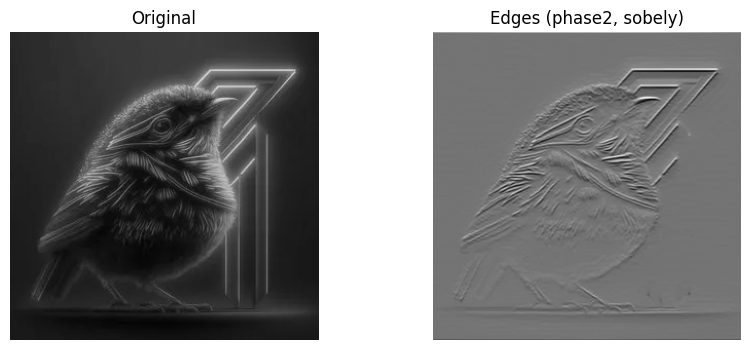

In [25]:
# Use cat.jpg in the current Colab directory for edge detection

# 1) Prep: load grayscale, save as float32 binary
from PIL import Image
import numpy as np

img_path = 'cat.jpg'   # must be in the current Colab working directory
img = Image.open(img_path).convert('L')
arr = (np.asarray(img, dtype=np.float32) / 255.0)
h, w = arr.shape
arr.tofile('input.f32')

# 2) Build the runner
!nvcc -arch=sm_75 -O3 -Xptxas -v -maxrregcount=64 edge_detect_runner.cu -o edge_runner

# 3) Run edge detection (choose mode: phase2 | phase4 | phase5; kernel: edge | sobelx | sobely)
mode = 'phase2'
kernel = 'edge'
!./edge_runner --mode={mode} --kernel={kernel} --in=input.f32 --out=output.f32 --w={w} --h={h}

# 4) Visualize original vs. edge image
import matplotlib.pyplot as plt
edge = np.fromfile('output.f32', dtype=np.float32).reshape(h, w)
edge_norm = (edge - edge.min()) / (edge.max() - edge.min() + 1e-8)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.title('Original'); plt.axis('off'); plt.imshow(arr, cmap='gray', vmin=0, vmax=1)
plt.subplot(1,2,2); plt.title(f'Edges ({mode}, {kernel})'); plt.axis('off'); plt.imshow(edge_norm, cmap='gray', vmin=0, vmax=1)
plt.show()